# Types

## Float

![](https://media.geeksforgeeks.org/wp-content/uploads/Single-Precision-IEEE-754-Floating-Point-Standard.jpg)

Float is used to store single-precision floating point numbers. It can store decimal values with precision up to 6-7 decimal places.

## Double

![](https://media.geeksforgeeks.org/wp-content/uploads/Double-Precision-IEEE-754-Floating-Point-Standard-1024x266.jpg)

Double is used to store double precision floating point values. It is the greater version of float which can store real numbers with precision up to 15 decimal places.

Geeks for Geeks: [Ref](https://www.geeksforgeeks.org/c-float-and-double/)

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [138]:
from gecko_messages.utils import *
from collections import namedtuple
from pprint import pprint
from colorama import Fore
import sys
from matplotlib import pyplot as plt
import numpy as np

In [172]:
drange = namedtuple("drange","min max")
dfprange = namedtuple("drange","fracbit min max res")

def irange(bits, signed):
    """Integer"""
    if signed:
        return drange(-2**(bits-1),2**(bits-1)-1)
    return drange(0,2**bits-1)

def frange(double=True):
    """Floating point"""
    if double:
        return drange(sys.float_info.min,sys.float_info.max)
    return drange(1.175494351e-38,3.402823466e+38)

def fprange(frac):
    """Fixed Point"""
    whole = 32 - frac
    scale = 1.0 / (2**frac)
    minfp = -2**(whole-1)
    maxfp = 2**(whole-1) - scale
    return dfprange(frac, minfp, maxfp, scale)

print("uint8", irange(8,False))
print("int8", irange(8,True))
print("uint16", irange(16,False))
print("int16", irange(16,True))
print("uint32", irange(32,False))
print("int32", irange(32,True))
print("float:", frange(False))
print("double:", frange(True))

uint8 drange(min=0, max=255)
int8 drange(min=-128, max=127)
uint16 drange(min=0, max=65535)
int16 drange(min=-32768, max=32767)
uint32 drange(min=0, max=4294967295)
int32 drange(min=-2147483648, max=2147483647)
float: drange(min=1.175494351e-38, max=3.402823466e+38)
double: drange(min=2.2250738585072014e-308, max=1.7976931348623157e+308)


In [178]:
for i in range(13,25):
    print(f"fp: {fprange(i)}")

fp: drange(fracbit=13, min=-262144, max=262143.9998779297, res=0.0001220703125)
fp: drange(fracbit=14, min=-131072, max=131071.99993896484, res=6.103515625e-05)
fp: drange(fracbit=15, min=-65536, max=65535.99996948242, res=3.0517578125e-05)
fp: drange(fracbit=16, min=-32768, max=32767.99998474121, res=1.52587890625e-05)
fp: drange(fracbit=17, min=-16384, max=16383.999992370605, res=7.62939453125e-06)
fp: drange(fracbit=18, min=-8192, max=8191.999996185303, res=3.814697265625e-06)
fp: drange(fracbit=19, min=-4096, max=4095.9999980926514, res=1.9073486328125e-06)
fp: drange(fracbit=20, min=-2048, max=2047.9999990463257, res=9.5367431640625e-07)
fp: drange(fracbit=21, min=-1024, max=1023.9999995231628, res=4.76837158203125e-07)
fp: drange(fracbit=22, min=-512, max=511.9999997615814, res=2.384185791015625e-07)
fp: drange(fracbit=23, min=-256, max=255.9999998807907, res=1.1920928955078125e-07)
fp: drange(fracbit=24, min=-128, max=127.99999994039536, res=5.960464477539063e-08)


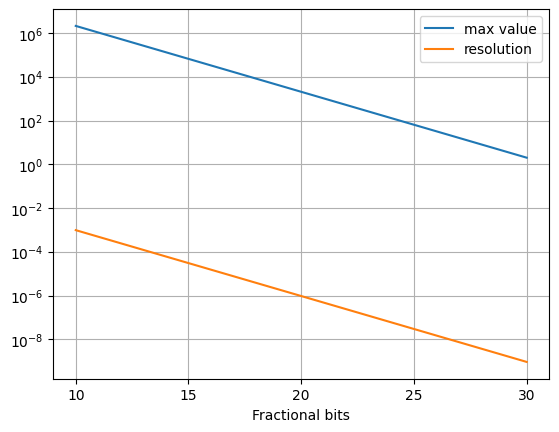

In [181]:
fp = []
bits = []
for i in range(10,31):
    a = fprange(i)
    fp.append((a.min, a.max, a.res))
    bits.append(i)

fp = np.array(fp)
plt.semilogy(bits, fp[:,1], label="max value")
plt.semilogy(bits, fp[:,2], label="resolution")
plt.xlabel("Fractional bits")
plt.locator_params(axis="x", integer=True, tight=True)
plt.grid(True)
plt.legend();

In [182]:
VarInfo = namedtuple("VarInfo","c py size fmt complex range")

var_types = {
    # Standard scalar types --------------------------------------------------------
    "uint8":  VarInfo("uint8_t",  "int",   1, "B", False, irange(8,False)),
    "uint16": VarInfo("uint16_t", "int",   2, "H", False, irange(16,False)),
    "uint32": VarInfo("uint32_t", "int",   4, "I", False, irange(32,False)),
    "uint64": VarInfo("uint64_t", "int",   8, "Q", False, irange(64,False)),
    "int8":   VarInfo("int8_t",   "int",   1, "b", False, irange(8,True)),
    "int16":  VarInfo("int16_t",  "int",   2, "h", False, irange(16,True)),
    "int32":  VarInfo("int32_t",  "int",   4, "i", False, irange(32,True)),
    "int64":  VarInfo("int64_t",  "int",   8, "q", False, irange(64,True)),
    "float":  VarInfo("float",    "float", 4, "f", False, frange(False)),
    "double": VarInfo("double",   "float", 8, "d", False, frange(True)),
    # ROS inspired messages -------------------------------------------------------
    # "vec_t":    VarInfo("vec_t",    "vec_t",    12, "3f", True), # [x y z]
    # "quat_t":   VarInfo("quat_t",   "quat_t",   16, "4f", True), # [w x y z]
    # "twist_t":  VarInfo("twist_t",  "twist_t",  24, "6f", True), # [linear, angular]
    # "wrench_t": VarInfo("wrench_t", "wrench_t", 24, "6f", True), # [force, torque]
    # "pose_t":   VarInfo("pose_t",   "pose_t",   28, "7f", True), # [position, attitude]
}

In [191]:
class base:
    def __str__(self):
        if self.len == 1: 
            return f"{self.type} {self.variable}(size={self.size}, fmt={self.fmt}, default={self.default})"
        return f"{self.type} {self.variable}[{self.len}](size={self.size}, fmt={self.fmt}, default={self.default})"
    def __repr__(self):
        return str(self)
    def c_format(self):
        if self.len == 1: 
            return f"{self.type} {self.variable} = {self.default};"
        default = str(self.default).replace('[','{').replace(']','}')
        return f"{self.type} {self.variable}[{self.len}]{default};"
    def py_format(self):
        if self.len == 1:
            return f"{self.variable}: {self.type} = {self.default}"
        # mags: list[vec_t] = field(default_factory=(lambda:[0, 0, 0]))
        return f"{self.variable}: list[{self.type}] = field(default_factory=(lambda: {self.default}))"
        
class Scalar(base):
    def __init__(self, var, type, len):
        if not isinstance(var, str) or not isinstance(len, int) or len < 1:
            raise Exception(f"Invalid: {var} and/or {len}")
        if not isinstance(type, str) or type not in var_types:
            raise Exception(f"Invalid: {type}")
        self.variable = var
        self.type = type
        self.len = len
        self.complex = False
        self.c = var_types[type].c
        self.py = var_types[type].py
        self.default = [0]*len if len > 1 else 0
        self.size = len*var_types[type].size
        self.fmt = f"{len}{var_types[type].fmt}" if len > 1 else var_types[type].fmt

class Quat(base):
    def __init__(self, var, len):
        if not isinstance(var, str) or not isinstance(len, int) or len < 1:
            raise Exception(f"Invalid: {var} and/or {len}")
        self.variable = var
        self.type = "quat_t"
        self.len = len
        self.complex = True
        self.default = [[0,0,0] for _ in range(len)] if len > 1 else [0,0,0]
        self.size = 4*4*len
        self.fmt = f"{4*len}f"

class Vec(base):
    def __init__(self, var, len):
        if not isinstance(var, str) or not isinstance(len, int) or len < 1:
            raise Exception(f"Invalid: {var} and/or {len}")
        self.variable = var
        self.type = "vec_t"
        self.len = len
        self.complex = True
        self.default = [[0,0,0] for _ in range(len)] if len > 1 else [0,0,0]
        self.size = 3*4*len
        self.fmt = f"{3*len}f"

class Twist(base):
    def __init__(self, var, len):
        if not isinstance(var, str) or not isinstance(len, int) or len < 1:
            raise Exception(f"Invalid: {var} and/or {len}")
        self.variable = var
        self.type = "twist_t"
        self.len = len
        self.complex = True
        self.default = [[0,0,0,0,0,0] for _ in range(len)] if len > 1 else [0,0,0,0,0,0]
        self.size = 6*4*len
        self.fmt = f"{6*len}f"

class Wrench(base):
    def __init__(self, var, len):
        if not isinstance(var, str) or not isinstance(len, int) or len < 1:
            raise Exception(f"Invalid: {var} and/or {len}")
        self.variable = var
        self.type = "wrench_t"
        self.len = len
        self.complex = True
        self.default = [[0,0,0,0,0,0] for _ in range(len)] if len > 1 else [0,0,0,0,0,0]
        self.size = 6*4*len
        self.fmt = f"{6*len}f"

class Pose(base):
    def __init__(self, var, len):
        if not isinstance(var, str) or not isinstance(len, int) or len < 1:
            raise Exception(f"Invalid: {var} and/or {len}")
        self.variable = var
        self.type = "pose_t"
        self.len = len
        self.complex = True
        self.default = [[0,0,0,1,0,0,0] for _ in range(len)] if len > 1 else [0,0,0,1,0,0,0]
        self.size = 7*4*len
        self.fmt = f"{7*len}f"
        
print(Scalar("x","float",1))
print(Scalar("y","uint32",3))
print(Pose("bob",1))
print("Python -------------------")
print(Scalar("y","uint32",3).py_format())
print(Vec("bob",2).py_format())
print("C ------------------------")
print(Scalar("x","float",1).c_format())
print(Vec("bob",2).c_format())

float x(size=4, fmt=f, default=0)
uint32 y[3](size=12, fmt=3I, default=[0, 0, 0])
pose_t bob(size=28, fmt=7f, default=[0, 0, 0, 1, 0, 0, 0])
Python -------------------
y: list[uint32] = field(default_factory=(lambda: [0, 0, 0]))
bob: list[vec_t] = field(default_factory=(lambda: [[0, 0, 0], [0, 0, 0]]))
C ------------------------
float x = 0;
vec_t bob[2]{{0, 0, 0}, {0, 0, 0}};


In [192]:
def var_fix(data):
    """
    format variables in message properly from the TOML template
    float-x => float x
    float_3_x => float[3] x
    """
    vars = []
    key_remove = []
    
    for k,val in data["message"].items():
        try:
            # there are some keys that are not variable types
            # and we are just protecting them here
            if k == "id":
                continue
            if k == "name":
                continue

            key_remove.append(k)

            type, var = k.split('-')
            array_size = int(val)
            
            if type == "quat":
                v = Quat(var, array_size)
            elif type == "twist":
                v = Twist(var, array_size)
            else:
                v = Scalar(var, type, array_size)
            vars.append(v)
        except ValueError:
            continue

    # Add in new namedtuple Var array
    data["message"]["vars"] = vars

    # remove old keys that were replaced above with namedtuple code
    for k in key_remove:
        data["message"].pop(k)

    return data

In [198]:
msg = {
    "message": {
        "float-x": 2,
        "float-y": 3,
        "uint16-z": 1,
        "quat-att": 2,
        "twist-a": 1,
        "twist-b": 2
    },
    "global": {
        "license": "MIT",
        "namespace": "msgs",
        "a": {"b":34, "c": {"d": 33}}
    },
    "top": 3
}

d = var_fix(msg)
pprint(d)

{'global': {'a': {'b': 34, 'c': {'d': 33}},
            'license': 'MIT',
            'namespace': 'msgs'},
 'message': {'vars': [float x[2](size=8, fmt=2f, default=[0, 0]),
                      float y[3](size=12, fmt=3f, default=[0, 0, 0]),
                      uint16 z(size=2, fmt=H, default=0),
                      quat_t att[2](size=32, fmt=8f, default=[[0, 0, 0], [0, 0, 0]]),
                      twist_t a(size=24, fmt=6f, default=[0, 0, 0, 0, 0, 0]),
                      twist_t b[2](size=48, fmt=12f, default=[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])]},
 'top': 3}


In [206]:
def recurse(k,v, indent=0):
    i_len = ' '*indent
    if isinstance(v, dict):
        print(f"{i_len}{Fore.CYAN}{k}{Fore.RESET}")
        for kk,vv in v.items():
            recurse(kk,vv, indent+1)
    elif isinstance(v, list):
        print(f"{i_len}{Fore.GREEN}{k}{Fore.RESET}")
        for vv in v:
            print(f"{i_len} {vv}")
    else:
        print(f"{i_len}{Fore.BLUE}{k}: {Fore.YELLOW}{v}{Fore.RESET}")

for k,v in d.items():
    recurse(k,v)

message
 vars
  float x[2](size=8, fmt=2f, default=[0, 0])
  float y[3](size=12, fmt=3f, default=[0, 0, 0])
  uint16 z(size=2, fmt=H, default=0)
  quat_t att[2](size=32, fmt=8f, default=[[0, 0, 0], [0, 0, 0]])
  twist_t a(size=24, fmt=6f, default=[0, 0, 0, 0, 0, 0])
  twist_t b[2](size=48, fmt=12f, default=[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
global
 license: MIT
 namespace: msgs
 a
  b: 34
  c
   d: 33
top: 3


In [207]:
import json

a = """{
    "message": {
        "a": 1,
        "b": 3
    }
}"""
json.loads(a)

{'message': {'a': 1, 'b': 3}}